### 1. We shall use the same dataset used in previous assignment - digits. Make a 80- 20 train/test split. 

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

<Figure size 432x288 with 0 Axes>

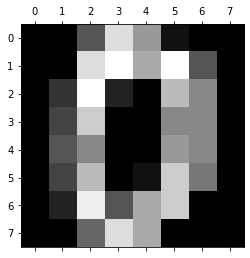

In [2]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### 2. Using scikit learn perform a LDA on the dataset. Find out the number ofcomponents in the projected subspace. 

In [3]:
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


[0.3041415  0.48622503 0.65209032 0.76358858 0.84499103]


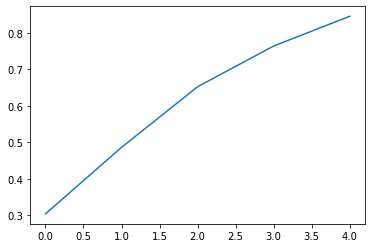

In [6]:
model_lda = LDA(n_components=5)

model_lda.fit(x_train,y_train)

plt.plot(np.cumsum(model_lda.explained_variance_ratio_))
print(np.cumsum(model_lda.explained_variance_ratio_))
plt.show()

### 3. Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model based on PCA in terms of accuracy andmodel complexity.

In [7]:
train_x = model_lda.transform(x_train)
test_x = model_lda.transform(x_test)

In [11]:
log_model = LogisticRegression()
log_model.fit(train_x, y_train)

predicted_values = log_model.predict(test_x)

print("Accuracy Score\n")
print(accuracy_score(predicted_values, y_test))
print("\n\n")

Accuracy Score

0.9083333333333333





C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
# After LDA model has 90 % of accuracy it is almost same as the accuracy from PCA method.